In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [5]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.4899

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 58s 2s/step - loss: 0.6948 - accuracy: 0.4899 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/20
31/31 [==============================] - 59s 2s/step - loss: 0.6938 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 3/20
31/31 [==============================] - 62s 2s/step - loss: 0.6933 - accuracy: 0.4768 - val_loss: 0.6931 - val_accuracy: 0.4960
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4990

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 63s 2s/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/20
31/31 [==============================] - 55s 2s/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 6/20
31/31 [==============================] - 61s 2s/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4990

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


31/31 [==============================] - 48s 2s/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 8/20
31/31 [==============================] - 43s 1s/step - loss: 0.6932 - accuracy: 0.4525 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 9/20
31/31 [==============================] - 41s 1s/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 10/20
31/31 [==============================] - 43s 1s/step - loss: 0.6932 - accuracy: 0.4687 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 11/20
31/31 [==============================] - 43s 1s/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 12/20
31/31 [==============================] - 48s 2s/step - loss: 0.6933 - accuracy: 0.4828 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 13/20
31/31 [==============================] - 42s 1s/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 14/20
31/31 [========

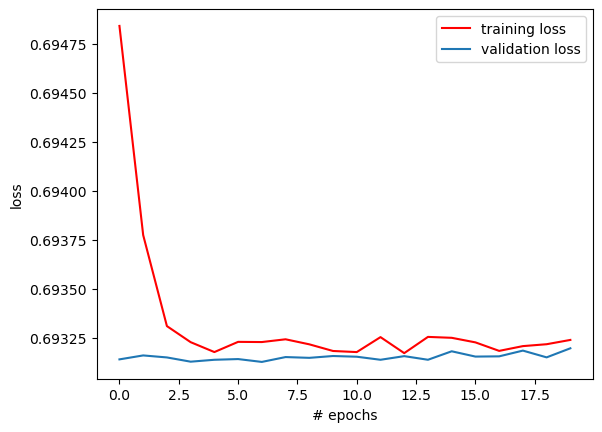

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()